# IRIS Dataset Classification Using K-Nearest Neighbors 

## Import Required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

## Import Dataset & Exploring it

In [2]:
    df = pd.read_csv('IRIS.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


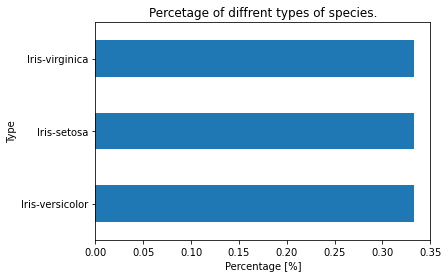

In [6]:
df['species'].value_counts(normalize=True).plot(kind='barh')
plt.title('Percetage of diffrent types of species.')
plt.xlabel('Percentage [%]')
plt.ylabel('Type');

## Splitting

In [7]:
target = 'species'
X = df.drop(columns=target)
y = df[target]

In [8]:
norm = Normalizer()
X_norm = norm.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=42, test_size=0.2)

## Model Building

In [9]:
model = KNeighborsClassifier(n_neighbors=7)

In [10]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
y_pred = model.predict(X_train)
y_pred[:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

## Model Evaluation

In [12]:
accuracy_score(y_train, y_pred)

0.9833333333333333

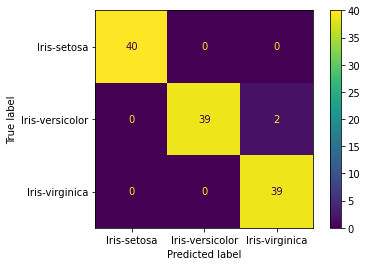

In [13]:
ConfusionMatrixDisplay.from_estimator(model,X_train, y_train);

In [14]:
y_test_pred = model.predict(X_test)
accuracy_score(y_test, y_test_pred)

1.0

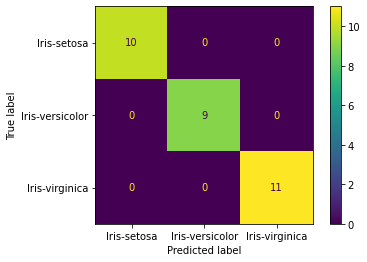

In [15]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred);